In [1]:
from model import *
from data import *

2024-11-08 17:59:57.923257: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-08 17:59:58.062397: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-08 17:59:58.062441: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-08 17:59:58.062447: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-08 17:59:58.127018: I tensorflow/core/platform/cpu_feature_g

## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [2]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=2000,epochs=5,callbacks=[model_checkpoint])

2024-11-08 16:42:59.487361: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-08 16:42:59.652991: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-08 16:42:59.653077: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-08 16:42:59.656396: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-08 16:42:59.656446: I tensorflow/compile

Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.


/tmp/ipykernel_37520/3357538038.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(myGene,steps_per_epoch=2000,epochs=5,callbacks=[model_checkpoint])


Epoch 1/5


2024-11-08 16:43:01.982232: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-11-08 16:43:02.330138: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-11-08 16:43:04.457252: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f912063bc00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-08 16:43:04.457298: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-11-08 16:43:04.470540: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-08 16:43:04.564462: I ./tensorflow/compiler/jit/device_compiler.h:186

2000/2000 [==============================] - ETA: 0s - loss: 1.0445 - accuracy: 0.9142
Epoch 1: loss improved from inf to 1.04453, saving model to unet_membrane.hdf5


/home/vcali/miniforge3/envs/unet_env/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2000/2000 [==============================] - 189s 90ms/step - loss: 1.0445 - accuracy: 0.9142
Epoch 2/5
2000/2000 [==============================] - ETA: 0s - loss: 0.1331 - accuracy: 0.9462
Epoch 2: loss improved from 1.04453 to 0.13307, saving model to unet_membrane.hdf5
2000/2000 [==============================] - 183s 92ms/step - loss: 0.1331 - accuracy: 0.9462
Epoch 3/5
2000/2000 [==============================] - ETA: 0s - loss: 0.1014 - accuracy: 0.9580
Epoch 3: loss improved from 0.13307 to 0.10144, saving model to unet_membrane.hdf5
2000/2000 [==============================] - 182s 91ms/step - loss: 0.1014 - accuracy: 0.9580
Epoch 4/5
2000/2000 [==============================] - ETA: 0s - loss: 0.0868 - accuracy: 0.9634
Epoch 4: loss improved from 0.10144 to 0.08680, saving model to unet_membrane.hdf5
2000/2000 [==============================] - 181s 91ms/step - loss: 0.0868 - accuracy: 0.9634
Epoch 5/5
2000/2000 [==============================] - ETA: 0s - loss: 0.0789 - accu

### Train with npy file

In [ ]:
#imgs_train,imgs_mask_train = geneTrainNpy("data/membrane/train/aug/","data/membrane/train/aug/")
#model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

### test your model and save predicted results

In [17]:
testGene = testGenerator("data/membrane/test")
model = unet()
model.load_weights("unet_membrane.hdf5")

In [18]:
results = model.predict_generator(testGene,30,verbose=1)

 1/30 [>.............................] - ETA: 4s

/tmp/ipykernel_54717/500298690.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  results = model.predict_generator(testGene,30,verbose=1)


30/30 [==============================] - 1s 29ms/step


In [16]:
saveResult("data/membrane/replication",results)

# IoU calculations

In [3]:
import os
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize

In [9]:
def iou_score(y_true, y_pred, threshold=0.5):
    # Apply threshold to convert probabilities to binary values (0 or 1)
    y_true = (y_true > threshold).astype(np.uint8)
    y_pred = (y_pred > threshold).astype(np.uint8)
    
    # Calculate intersection and union
    intersection = np.logical_and(y_true, y_pred).sum()
    union = np.logical_or(y_true, y_pred).sum()
    
    # Avoid division by zero
    iou = intersection / union if union != 0 else 0.0
    return iou

def calculate_mean_iou(ground_truth_dir, predicted_dir, threshold=0.5, target_size=(256, 256)):
    iou_scores = []
    for filename in os.listdir(ground_truth_dir):
        # Load ground truth and prediction images
        y_true_path = os.path.join(ground_truth_dir, filename)
        y_pred_path = os.path.join(predicted_dir, filename)
        
        # Check if both files exist
        if not os.path.exists(y_true_path) or not os.path.exists(y_pred_path):
            print(f"Warning: {filename} not found in both directories.")
            continue

        # Load images
        y_true = imread(y_true_path)
        y_pred = imread(y_pred_path)

        # If the images have 4 channels (RGBA), discard the alpha channel
        if y_true.ndim == 3 and y_true.shape[-1] == 4:
            y_true = y_true[..., :3]  # Keep only the RGB channels
        if y_pred.ndim == 3 and y_pred.shape[-1] == 4:
            y_pred = y_pred[..., :3]  # Keep only the RGB channels

        # If the image is RGB, convert it to grayscale (binary mask)
        if y_true.ndim == 3:
            y_true = rgb2gray(y_true)
        if y_pred.ndim == 3:
            y_pred = rgb2gray(y_pred)

        # Resize images to the target size (256x256)
        y_true = resize(y_true, target_size, anti_aliasing=True)
        y_pred = resize(y_pred, target_size, anti_aliasing=True)

        # Compute IoU score
        iou = iou_score(y_true, y_pred, threshold)
        iou_scores.append(iou)

    # Calculate mean IoU
    mean_iou = np.mean(iou_scores) if iou_scores else 0.0
    print(f"Mean IoU Score: {mean_iou}")
    return mean_iou

In [10]:
# Usage
ground_truth_dir = '/Dev/unet/data/membrane/evaluate/groundtruth'
predicted_dir = '/Dev/unet/data/membrane/evaluate/predictions'
calculate_mean_iou(ground_truth_dir, predicted_dir)

Mean IoU Score: 0.9186267695796906


0.9186267695796906

# OTHER STUFF

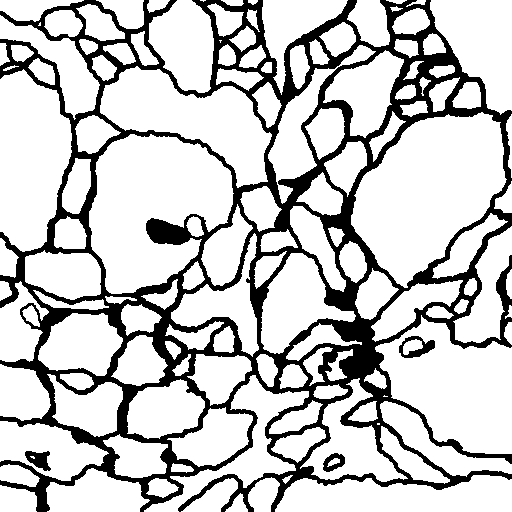

In [11]:
from PIL import Image
import numpy as np
# Open the image
with Image.open('/Dev/unet/data/membrane/train-labels.tif') as img:
    # Display the image
    img.show()

    # Convert to a NumPy array
    img_array = np.array(img)

    # Process the image array as needed (e.g., apply filters, resize)
    # ...

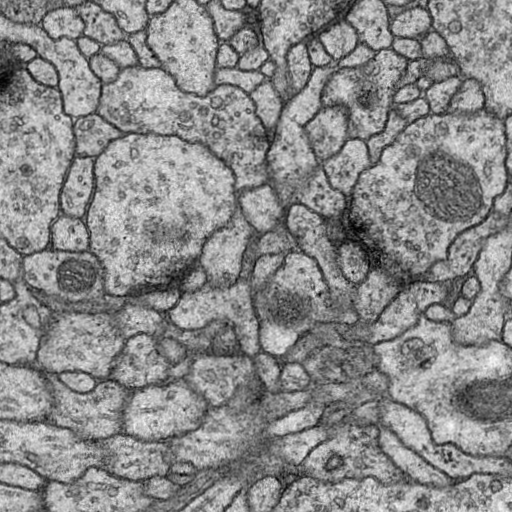

In [12]:
with Image.open('/Dev/unet/data/membrane/train-volume.tif') as img:
    # Display the image
    img.show()

    # Convert to a NumPy array
    img_array = np.array(img)

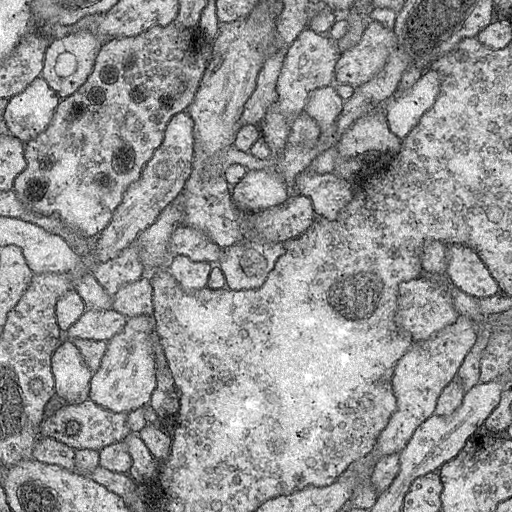

In [13]:
with Image.open('/Dev/unet/data/membrane/test-volume.tif') as img:
    # Display the image
    img.show()

    # Convert to a NumPy array
    img_array = np.array(img)